## data contraol Overview

+ [ ] 1.data load : local(CSV)
+ [ ] 2.missing value 변환
  + [ ] 1.describe  
  + [ ] 2.missing value 삭제
  + [ ] 3.outlier 제거
+ [ ] 3.value type 변환
  + [ ] 2.time to objedt
  + [ ] 3.objedt to time 
  + [ ] 4.objedt to Categorical 
  + [ ] 5.Categorical to embedding columns 
+ [ ] 4.data 변환/가공
  + [ ] 1.한글폰트 전역설정
  + [ ] 2.groupby
    + [ ] date value
    + [ ] key value 
  + [ ] 3.crosstab
  + [ ] 4.data 필터링
    + [ ] 포함조건
    + [ ] 제외조건
+ [ ] 4.data 시각화
  + [ ] bar
  + [ ] line
  + [ ] 개인별 timestamp
+ [ ] 6.data 분석 : TEB

In [2]:
import pandas as pd
import os
import numpy as np

import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.dates as mdates
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)                               # 한글폰트 설정(전역)

import warnings
warnings.filterwarnings('ignore')

## 1. data load

In [3]:
df1 = pd.read_csv('./190726_t-mon_review.csv', encoding = 'cp949', low_memory=False)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 9 columns):
DEAL              467 non-null int64
SCORE             467 non-null int64
BUY_ITEM          467 non-null object
BUY_ITEM_GUBUN    467 non-null object
REVIEW            467 non-null object
IMAGE_COUNT       467 non-null int64
REG_DATE          467 non-null object
RECOMMEND         467 non-null int64
ID                467 non-null object
dtypes: int64(4), object(5)
memory usage: 33.0+ KB


In [4]:
df1.head(2)

,DEAL,SCORE,BUY_ITEM,BUY_ITEM_GUBUN,REVIEW,IMAGE_COUNT,REG_DATE,RECOMMEND,ID
0,2220310102,4,매일유업 매일두 1만원 기프트카드,1만원,폴바셋 비싸지만 맛나요,0,2019-07-22,0,alfk***
1,2220310102,3,매일유업 매일두 1만원 기프트카드,1만원,할인받아서 좋긴한데 앱다운받아야하는 번거러움,0,2019-07-18,0,roza***


In [5]:
print("<data overview>")
print("별점 평균 : {:.3f} 점.".format(df1['SCORE'].mean()))
print("별점 상위 99% : {:.2f} 점, ".format(df1['SCORE'].quantile(0.99)))
print("이미지 첨부 평균 : {:.2f}개, ".format(df1['IMAGE_COUNT'].mean()))
print("리뷰 기간 : {} ~ {}".format(df1['REG_DATE'].min(), df1['REG_DATE'].max()))

<data overview>
별점 평균 : 4.786 점.
별점 상위 99% : 5.00 점, 
이미지 첨부 평균 : 0.26개, 
리뷰 기간 : 2018-10-25 ~ 2019-07-24


## 2.missing value 변환

In [6]:
df1 = df1.fillna(0)   # missing value 삭제
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 9 columns):
DEAL              467 non-null int64
SCORE             467 non-null int64
BUY_ITEM          467 non-null object
BUY_ITEM_GUBUN    467 non-null object
REVIEW            467 non-null object
IMAGE_COUNT       467 non-null int64
REG_DATE          467 non-null object
RECOMMEND         467 non-null int64
ID                467 non-null object
dtypes: int64(4), object(5)
memory usage: 33.0+ KB


## 3.value type 변환

In [7]:
df1.head(2)

,DEAL,SCORE,BUY_ITEM,BUY_ITEM_GUBUN,REVIEW,IMAGE_COUNT,REG_DATE,RECOMMEND,ID
0,2220310102,4,매일유업 매일두 1만원 기프트카드,1만원,폴바셋 비싸지만 맛나요,0,2019-07-22,0,alfk***
1,2220310102,3,매일유업 매일두 1만원 기프트카드,1만원,할인받아서 좋긴한데 앱다운받아야하는 번거러움,0,2019-07-18,0,roza***


In [10]:
df2 = df1.copy()
df2['REG_DATE']  = pd.to_datetime(df2['REG_DATE'],format=None) # object to datetime64
df2['REG_DATE2'] = df2.REG_DATE.astype(object)                  # datetime64 to object 
df2['YYYYMM'] = df1['REG_DATE'].str[:-3]


df2['BUY_ITEM_GUBUN'] = pd.Categorical(df2['BUY_ITEM_GUBUN'])   # object to Categorical
df2['BUY_ITEM_GUBUN'] = df2.BUY_ITEM_GUBUN.cat.codes


age = feature_column.numeric_column("age")


In [12]:
df2.head(2)

,DEAL,SCORE,BUY_ITEM,BUY_ITEM_GUBUN,REVIEW,IMAGE_COUNT,REG_DATE,RECOMMEND,ID,REG_DATE2,YYYYMM
0,2220310102,4,매일유업 매일두 1만원 기프트카드,0,폴바셋 비싸지만 맛나요,0,2019-07-22,0,alfk***,2019-07-22 00:00:00,2019-07
1,2220310102,3,매일유업 매일두 1만원 기프트카드,0,할인받아서 좋긴한데 앱다운받아야하는 번거러움,0,2019-07-18,0,roza***,2019-07-18 00:00:00,2019-07


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 11 columns):
DEAL              467 non-null int64
SCORE             467 non-null int64
BUY_ITEM          467 non-null object
BUY_ITEM_GUBUN    467 non-null int8
REVIEW            467 non-null object
IMAGE_COUNT       467 non-null int64
REG_DATE          467 non-null datetime64[ns]
RECOMMEND         467 non-null int64
ID                467 non-null object
REG_DATE2         467 non-null object
YYYYMM            467 non-null object
dtypes: datetime64[ns](1), int64(4), int8(1), object(5)
memory usage: 37.1+ KB


In [81]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
DEAL,467.0,1.970783e+09,2.724775e+08,1.576697e+09,1.748519e+09,2.171945e+09,2.171945e+09,2.220310e+09
SCORE,467.0,4.785867e+00,6.785916e-01,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
IMAGE_COUNT,467.0,2.569593e-01,5.953411e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
RECOMMEND,467.0,7.708779e-02,3.045606e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00


In [83]:
df1_M1 = df1.groupby(by = ['REG_DATE'],as_index=False)['DEAL'].count()
df2_M1 = df2.groupby(by = ['YYYYMM'],as_index=False)['DEAL'].count()

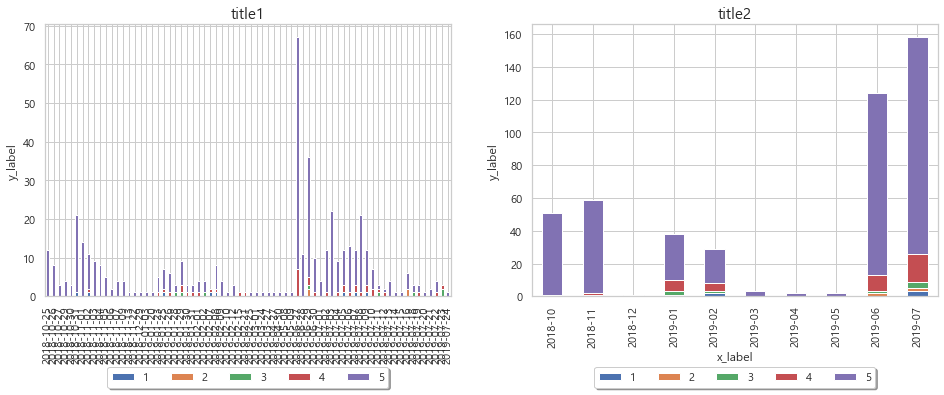

In [89]:
mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(df1.REG_DATE, df1.SCORE, df1.DEAL, aggfunc="count").plot.bar(stacked=True, ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.24), fancybox=True, shadow=True, ncol=5)
# plt.axvspan(10.5, 12.5, color='gray', alpha=0.3)
# plt.axvspan(12.5, 15.5, color='red', alpha=0.2)
plt.title('title1',fontsize=15)
plt.xlabel('x_label')
plt.ylabel('y_label')

ax = plt.subplot(1,2,2)
pd.crosstab(df2.YYYYMM, df2.SCORE, df2.DEAL, aggfunc="count").plot.bar(stacked=True,  ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.24), fancybox=True, shadow=True, ncol=5)
# # plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('title2',fontsize=15)
plt.xlabel('x_label')
plt.ylabel('y_label')

plt.show()

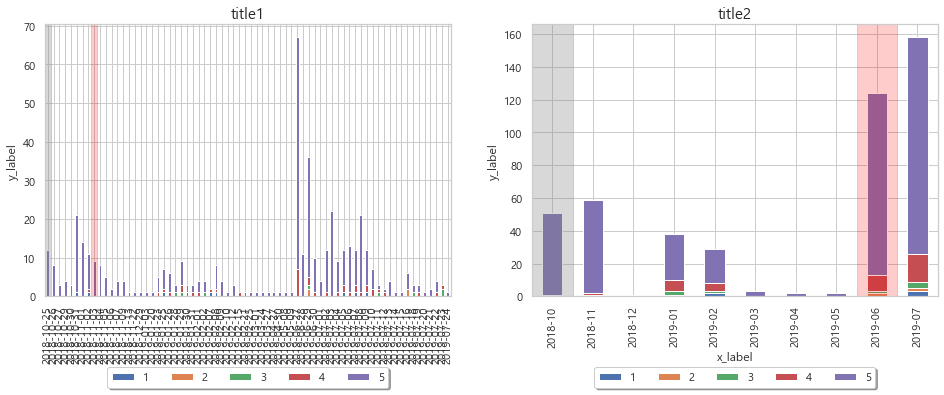

In [94]:
mpl.rc('figure', figsize=(16, 5))

ax = plt.subplot(1,2,1)
pd.crosstab(df1.REG_DATE, df1.SCORE, df1.DEAL, aggfunc="count").plot.bar(stacked=True, ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.24), fancybox=True, shadow=True, ncol=5)
plt.axvspan(-0.5, 0.5, color='gray', alpha=0.3)
plt.axvspan(7.5, 8.5, color='red', alpha=0.2)
plt.title('title1',fontsize=15)
plt.xlabel('x_label')
plt.ylabel('y_label')

ax = plt.subplot(1,2,2)
pd.crosstab(df2.YYYYMM, df2.SCORE, df2.DEAL, aggfunc="count").plot.bar(stacked=True,  ax = ax)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.24), fancybox=True, shadow=True, ncol=5)
plt.axvspan(-0.5, 0.5, color='gray', alpha=0.3)
plt.axvspan(7.5, 8.5, color='red', alpha=0.2)
plt.title('title2',fontsize=15)
plt.xlabel('x_label')
plt.ylabel('y_label')

plt.show()